# Setup

In [ ]:
import pandas as pd

In [ ]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

query = """SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka`"""
job = client.query(query)
df = job.to_dataframe()

# Carregar dataframe

In [ ]:
df.head()

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_OUTROS,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,...,GC_OfertaNegociacao_3m,CD_Boleto_3m,CX_Cliente_NaoCompreende_3m,PL_Sem_Condicoes_3m,NV_DC10_Cliente_alega_pagamento_3m,NV_FC_NEGOCIACAO_COM_SUCESSO_3m,NV_BP4_Informa_o_desconto_3m,Duracao_segundos,fl_renovou,VrFinanciamento
0,0,4,1267.0,251.0,5,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.323663
1,1,4,1797.0,236.0,4,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,0,0.882514
2,2,4,268.0,18.0,3,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,0,-0.385405
3,3,8,422.0,323.0,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,0,-0.707045
4,4,8,5073.0,252.0,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0,0,1.035186


In [ ]:
df.columns

Index(['ID', 'Capacidade_de_Pagamento_7', 'tempo_desde_primeiro_contrato',
       'tempo_desde_ultimo_contrato', 'QTD_SEGURO', 'QTD_OUTROS',
       'QTD_CP_CONSIGNADO', 'QTD_CDCCG', 'QTD_CONTA_DIGITAL', 'QTD_CARTAO',
       ...
       'GC_OfertaNegociacao_3m', 'CD_Boleto_3m', 'CX_Cliente_NaoCompreende_3m',
       'PL_Sem_Condicoes_3m', 'NV_DC10_Cliente_alega_pagamento_3m',
       'NV_FC_NEGOCIACAO_COM_SUCESSO_3m', 'NV_BP4_Informa_o_desconto_3m',
       'Duracao_segundos', 'fl_renovou', 'VrFinanciamento'],
      dtype='object', length=306)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 306 entries, ID to VrFinanciamento
dtypes: float64(286), int64(13), object(7)
memory usage: 116.7+ MB


# Variavéis Categóricas

In [ ]:
list(df.select_dtypes(['object']).columns)

['QTD_SEGURO',
 'NmMotivoContratoFinanceiro',
 'Sub_Produto',
 'CdMarca',
 'FlZeroKm',
 'CdUfNaturalidade',
 'CdOcupacaoCBO']

In [ ]:
df.CdUfNaturalidade.unique()

array(['Centro-oeste', 'Sudeste', 'Sul', 'Norte', 'Nordeste', 'nan'],
      dtype=object)

In [ ]:
df.CdUfNaturalidade.value_counts()

Sudeste         23228
Sul             10456
Nordeste         6831
Centro-oeste     3976
Norte            3046
nan              2463
Name: CdUfNaturalidade, dtype: int64

In [ ]:
df.QTD_SEGURO.nunique()

13

In [ ]:
df.QTD_SEGURO.unique()

array(['5', '4', '3', '2', '1', '9', '6', '7', '12', '11', '12 ou +',
       '10', '8'], dtype=object)

In [ ]:
df.FlZeroKm.unique()

array(['N', 'S', ''], dtype=object)

In [ ]:
df.FlZeroKm.value_counts()

N    49274
S      665
        61
Name: FlZeroKm, dtype: int64

In [ ]:
df.CdMarca.unique()

array(['FIAT', 'VOLKSWAGEN', 'NISSAN', 'Outros', 'RENAULT', 'FORD',
       'CHEVROLET', 'PEUGEOT', 'HONDA', 'TOYOTA', 'HYUNDAI', 'KIA',
       'MITSUBISHI', 'CITROEN', '', 'MERCEDES-BENZ', 'JEEP'], dtype=object)

In [ ]:
df.CdMarca.value_counts()

VOLKSWAGEN       10441
FIAT              9801
CHEVROLET         8623
FORD              4541
RENAULT           3380
HYUNDAI           3175
TOYOTA            2139
HONDA             2076
CITROEN           1309
PEUGEOT           1040
Outros             824
NISSAN             781
MITSUBISHI         648
KIA                635
JEEP               242
MERCEDES-BENZ      226
                   119
Name: CdMarca, dtype: int64

In [ ]:
df.NmMotivoContratoFinanceiro.unique()

array(['FLUXO FINANCEIRO INICIAL', 'CONTRATO CEDIDO (FIDC)',
       'RENEGOCIAÇAO', 'SALDO REMANESCENTE',
       'CORREÇAO DE FLUXO FINANCEIRO / REIMPLANTE'], dtype=object)

In [ ]:
df.NmMotivoContratoFinanceiro[df.fl_renovou == 1].value_counts()

FLUXO FINANCEIRO INICIAL                     1190
CONTRATO CEDIDO (FIDC)                        279
RENEGOCIAÇAO                                  106
SALDO REMANESCENTE                             11
CORREÇAO DE FLUXO FINANCEIRO / REIMPLANTE       4
Name: NmMotivoContratoFinanceiro, dtype: int64

In [ ]:
df.NmMotivoContratoFinanceiro.value_counts()

FLUXO FINANCEIRO INICIAL                     36390
CONTRATO CEDIDO (FIDC)                        9084
RENEGOCIAÇAO                                  4027
SALDO REMANESCENTE                             420
CORREÇAO DE FLUXO FINANCEIRO / REIMPLANTE       79
Name: NmMotivoContratoFinanceiro, dtype: int64

In [ ]:
df.Sub_Produto.unique()

array(['CDC VEICULOS DE PASSEIO', 'REFINANCIAMENTO VEICULOS DE PASSEIO',
       'Outros', 'CDC CAMINHOES', 'PRE APROVADO CDC VEICULOS DE PASSEIO',
       'CDC VANS e MICRO-ONIBUS', 'MOTO', 'CP COM GARANTIA'], dtype=object)

In [ ]:
df.Sub_Produto[df.fl_renovou == 1].value_counts()

CDC VEICULOS DE PASSEIO                 1533
REFINANCIAMENTO VEICULOS DE PASSEIO       27
CDC VANS e MICRO-ONIBUS                   12
MOTO                                       9
CDC CAMINHOES                              4
PRE APROVADO CDC VEICULOS DE PASSEIO       3
CP COM GARANTIA                            2
Name: Sub_Produto, dtype: int64

In [ ]:
df.Sub_Produto.value_counts()

CDC VEICULOS DE PASSEIO                 47004
REFINANCIAMENTO VEICULOS DE PASSEIO      1560
MOTO                                      540
CDC VANS e MICRO-ONIBUS                   336
PRE APROVADO CDC VEICULOS DE PASSEIO      333
CP COM GARANTIA                           113
CDC CAMINHOES                              83
Outros                                     31
Name: Sub_Produto, dtype: int64

# Taxa de renovação

Objetivo: Dobrar taxa de renovação

In [ ]:
print("TAXA DE RENOVAÇÃO",(df['fl_renovou'].sum()/len(df))*100)

TAXA DE RENOVAÇÃO 3.18


# Colunas com muitos valores ausentes

In [ ]:
df.isna().sum().sort_values(ascending=False).head(40)

CD_Quitacao_6m                                    49151
NV_CX_Direcionamento_Outro_Canal_3m               49111
CD_Boleto_3m                                      48992
CD_Cartao_3m                                      48977
NV_FC_NEGOCIACAO_COM_SUCESSO_3m                   48935
CX_Oferta_6m                                      48886
NV_P3_Quitacao_6m                                 48867
CX_Busca_Informacoes_6m                           48841
CX_Cliente_NaoCompreende_3m                       48773
NV_CX_Ligar_de_Volta_3m                           48735
NV_CX_Atendimento_Diferenciado_6m                 48686
CD_Seguro_6m                                      48646
NV_P9_Pagamento_parcial__flexibilidade__6m        48646
NV_DC1_Cliente_nao_esta_com_o_valor_em_maos_6m    48550
NV_BP4_Informa_o_desconto_3m                      48509
CX_Cancelamento_6m                                48504
MOT_Informacao_3m                                 48502
CX_Pesquisa_Satisfacao_3m                       

In [ ]:
# Listas com os nomes das colunas para facilitar consulta

In [ ]:
colunas = [c for c in df.columns]

mailing = ['fl_renovou','Duracao_segundos']

cadastrais = ['CdUfNaturalidade','Grupo_Etario','VrRenda','CdOcupacaoCBO']

contratuais = ['NmMotivoContratoFinanceiro','Sub_Produto','VrContrato','VrFinanciamento','VrEntrada','QtParcelas','AaFabricacaoVeiculo',
'CdMarca','VrMercado','FlZeroKm','QtCilindradaVeiculo','QtQuilometragemVeiculo','QtAnoIdade']

scores = ['Capacidade_de_Pagamento_1','Capacidade_de_Pagamento_2','Capacidade_de_Pagamento_3','Capacidade_de_Pagamento_4',
'Capacidade_de_Pagamento_5','Capacidade_de_Pagamento_6','Capacidade_de_Pagamento_7']

relacionamentoBV = ['tempo_desde_primeiro_contrato','tempo_desde_ultimo_contrato','QTD_SEGURO','QTD_CP_CONSIGNADO','QTD_CDCCG',
'QTD_CONTA_DIGITAL','QTD_CARTAO','QTD_CP','QTD_OUTROS','flmat30conta','flmat60conta','flmat90conta','flmau30conta','flmau60conta',
'flmau90conta']

f1 = [c for c in colunas if 'F1' in c]

f2 = [c for c in colunas if 'F2' in c]

f3 = [c for c in colunas if 'F3' in c]

f4 = [c for c in colunas if 'F4' in c]

m3 = [c for c in colunas if '3m' in c]

m6 = [c for c in colunas if '6m' in c]


In [ ]:
print(len(mailing)+len(cadastrais)+len(contratuais)+len(scores)+len(relacionamentoBV))

41


In [ ]:
df[f1] = df[f1].replace(np.nan,0)
df[f2] = df[f2].replace(np.nan,0)
df[f3] = df[f3].replace(np.nan,0)
df[f4] = df[f4].replace(np.nan,0)


df['f1'] = df[f1].sum(axis=1)
df['f2'] = df[f2].sum(axis=1)
df['f3'] = df[f3].sum(axis=1)
df['f4'] = df[f4].sum(axis=1)


In [ ]:
df[m3] = df[m3].replace(np.nan,0)
df[m6] = df[m6].replace(np.nan,0)

df['3m'] = df[m3].sum(axis=1)
df['6m'] = df[m6].sum(axis=1)

In [ ]:
df['Duracao_segundos'].describe()

count    19669.000000
mean       186.223956
std        309.796218
min         13.000000
25%         57.000000
50%         92.000000
75%        161.000000
max       5462.000000
Name: Duracao_segundos, dtype: float64

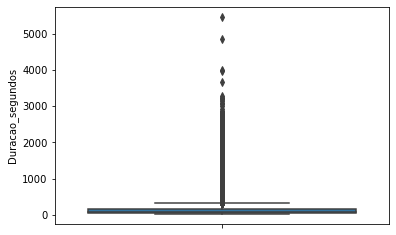

In [ ]:
ax = sns.boxplot(data = df,y = 'Duracao_segundos')

In [ ]:
df['Duracao_segundos'].describe()

count    19669.000000
mean       186.223956
std        309.796218
min         13.000000
25%         57.000000
50%         92.000000
75%        161.000000
max       5462.000000
Name: Duracao_segundos, dtype: float64

In [ ]:
df['CdOcupacaoCBO'].nunique()

48

In [ ]:
df['CdOcupacaoCBO'].value_counts(normalize=True)

2684             0.21846
Indeterminado    0.16150
7897             0.15498
5411             0.06226
Outros           0.05988
3995             0.02602
6568             0.02104
2362             0.02064
5078             0.01958
1988             0.01930
7906             0.01824
3968             0.01440
8022             0.01418
7598             0.01074
10101            0.01030
1103             0.01014
2210             0.00902
8620             0.00890
8069             0.00886
8700             0.00858
4140             0.00814
297              0.00738
1191             0.00734
5954             0.00712
6508             0.00696
7898             0.00594
3048             0.00560
8099             0.00542
188              0.00536
1381             0.00508
1932             0.00494
1491             0.00468
8673             0.00430
7328             0.00402
9502             0.00398
7326             0.00326
5594             0.00316
4857             0.00314
7631             0.00308
9170             0.00304


In [ ]:
df[relacionamentoBV]

,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,QTD_CP,QTD_OUTROS,flmat30conta,flmat60conta,flmat90conta,flmau30conta,flmau60conta,flmau90conta
0,1267.0,251.0,5,0,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1797.0,236.0,4,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,268.0,18.0,3,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,422.0,323.0,3,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5073.0,252.0,3,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1653.0,95.0,1,0,0,1,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0
49996,6729.0,101.0,3,0,0,1,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0
49997,239.0,94.0,1,0,0,1,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0
49998,883.0,179.0,1,0,0,1,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df['OUTROS_PROD_FORA_SEGURO'] = df[['QTD_CP_CONSIGNADO','QTD_CDCCG',
'QTD_CONTA_DIGITAL','QTD_CARTAO','QTD_CP','QTD_OUTROS']].sum(axis=1)
df['OUTROS_PROD_FORA_SEGURO'] 

0        2
1        1
2        1
3        0
4        0
        ..
49995    2
49996    2
49997    2
49998    2
49999    3
Name: OUTROS_PROD_FORA_SEGURO, Length: 50000, dtype: int64

In [ ]:
df['OUTROS_PROD_FORA_SEGURO'].value_counts(normalize=True)

2    0.37444
1    0.26074
0    0.22372
3    0.13870
4    0.00238
5    0.00002
Name: OUTROS_PROD_FORA_SEGURO, dtype: float64

In [ ]:
df['QtCilindradaVeiculo'].describe()

count    49942.000000
mean      1515.553666
std        612.008970
min         58.252237
25%       1000.000000
50%       1578.760977
75%       1800.000000
max      12098.268614
Name: QtCilindradaVeiculo, dtype: float64

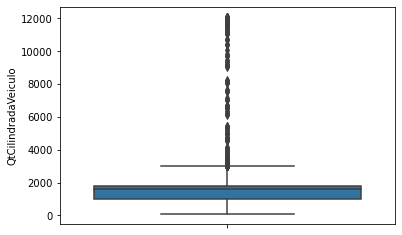

In [ ]:
ax = sns.boxplot(data = df,y = 'QtCilindradaVeiculo')

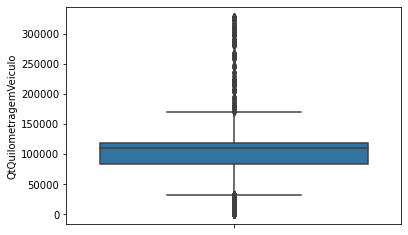

In [ ]:
ax = sns.boxplot(data = df,y = 'QtQuilometragemVeiculo')

## Perfil de quem renova o contrato

In [ ]:
renovou = (df.fl_renovou == 1)

In [ ]:
df[renovou]

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_OUTROS,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,...,CD_Boleto_3m,CX_Cliente_NaoCompreende_3m,PL_Sem_Condicoes_3m,NV_DC10_Cliente_alega_pagamento_3m,NV_FC_NEGOCIACAO_COM_SUCESSO_3m,NV_BP4_Informa_o_desconto_3m,Duracao_segundos,fl_renovou,VrFinanciamento,OUTROS_PROD_FORA_SEGURO
73,87,5,285.0,252.0,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,309.0,1,-1.210550,0
92,110,4,279.0,234.0,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,39.0,1,-0.844372,0
165,194,8,1705.0,162.0,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.781466,0
174,203,7,597.0,109.0,6,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1,0.244646,2
292,350,5,221.0,219.0,4,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,92.0,1,1.977284,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49925,44281,9,238.0,228.0,1,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,1,1.206254,2
49961,48369,8,202.0,202.0,1,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,1,0.176757,2
49971,48881,8,4698.0,98.0,3,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,84.0,1,-0.169885,2
49981,49198,8,230.0,99.0,3,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,161.0,1,-1.050382,3


In [ ]:
scores = ['Capacidade_de_Pagamento_1','Capacidade_de_Pagamento_2','Capacidade_de_Pagamento_3','Capacidade_de_Pagamento_4',
'Capacidade_de_Pagamento_5','Capacidade_de_Pagamento_6','Capacidade_de_Pagamento_7']

relacionamentoBV = ['tempo_desde_primeiro_contrato','tempo_desde_ultimo_contrato','QTD_SEGURO','QTD_CP_CONSIGNADO','QTD_CDCCG',
'QTD_CONTA_DIGITAL','QTD_CARTAO','QTD_CP','QTD_OUTROS','flmat30conta','flmat60conta','flmat90conta','flmau30conta','flmau60conta',
'flmau90conta']

In [ ]:
df.Capacidade_de_Pagamento_7.value_counts()

8    31450
5     5252
4     3371
7     3206
6     2915
9     2337
3     1247
0      110
2       62
1       50
Name: Capacidade_de_Pagamento_7, dtype: int64

In [ ]:
df.Capacidade_de_Pagamento_7.value_counts(normalize=True)

8    0.62900
5    0.10504
4    0.06742
7    0.06412
6    0.05830
9    0.04674
3    0.02494
0    0.00220
2    0.00124
1    0.00100
Name: Capacidade_de_Pagamento_7, dtype: float64

In [ ]:
df.QTD_CONTA_DIGITAL.value_counts(normalize=True)

0    0.63548
1    0.36452
Name: QTD_CONTA_DIGITAL, dtype: float64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmau30conta'].value_counts(dropna=False)

1.0    8810
0.0    4959
NaN    4457
Name: flmau30conta, dtype: int64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmau30conta'].value_counts(dropna=False,normalize=True)

1.0    0.483375
0.0    0.272084
NaN    0.244541
Name: flmau30conta, dtype: float64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmau60conta'].value_counts(dropna=False)

1.0    8359
0.0    4986
NaN    4881
Name: flmau60conta, dtype: int64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmau60conta'].value_counts(dropna=False,normalize=True)

1.0    0.458631
0.0    0.273565
NaN    0.267804
Name: flmau60conta, dtype: float64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmau90conta'].value_counts(dropna=False)

1.0    7767
0.0    5260
NaN    5199
Name: flmau90conta, dtype: int64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmau90conta'].value_counts(dropna=False,normalize=True)

1.0    0.426149
0.0    0.288599
NaN    0.285252
Name: flmau90conta, dtype: float64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmat30conta'].value_counts(dropna=False,normalize=True)

0.0    0.468561
1.0    0.274772
NaN    0.256666
Name: flmat30conta, dtype: float64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmat60conta'].value_counts(dropna=False,normalize=True)

0.0    0.472951
NaN    0.265500
1.0    0.261549
Name: flmat60conta, dtype: float64

In [ ]:
df[df.QTD_CONTA_DIGITAL == 1]['flmat90conta'].value_counts(dropna=False,normalize=True)

0.0    0.484967
NaN    0.278997
1.0    0.236036
Name: flmat90conta, dtype: float64